In [19]:
import json
import math
import numpy as np

import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

import matplotlib.pyplot as plt
import os

import string
from gensim.models import Word2Vec

----------------------------------------------------------------------------------------

# PAYS

**Liste des pays**

In [20]:
liste_pays = [
    "Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Andorre", "Angola",
    "Antigua-et-Barbuda", "Arabie saoudite", "Argentine", "Arménie", "Australie", "Autriche",
    "Azerbaïdjan", "Bahamas", "Bahreïn", "Bangladesh", "Barbade", "Belgique", "Belize",
    "Bénin", "Bhoutan", "Biélorussie", "Birmanie (Myanmar)", "Bolivie", "Bosnie-Herzégovine",
    "Botswana", "Brésil", "Brunei", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge",
    "Cameroun", "Canada", "Cap-Vert", "Centrafrique", "Chili", "Chine", "Chypre",
    "Colombie", "Comores", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire",
    "Croatie", "Cuba", "Danemark", "Djibouti", "Dominique", "Égypte", "Émirats arabes unis",
    "Équateur", "Érythrée", "Espagne", "Estonie", "États-Unis", "Éthiopie", "Fidji",
    "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Grenade",
    "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti",
    "Honduras", "Hongrie", "Îles Marshall", "Îles Salomon", "Inde", "Indonésie",
    "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon",
    "Jordanie", "Kazakhstan", "Kenya", "Kirghizistan", "Kiribati", "Koweït", "Laos",
    "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Liechtenstein", "Lituanie",
    "Luxembourg", "Macédoine", "Madagascar", "Malaisie", "Malawi", "Maldives",
    "Mali", "Malte", "Maroc", "Maurice", "Mauritanie", "Mexique", "Micronésie",
    "Moldavie", "Monaco", "Mongolie", "Monténégro", "Mozambique", "Namibie", "Nauru",
    "Népal", "Nicaragua", "Niger", "Nigéria", "Niue", "Norvège", "Nouvelle-Zélande",
    "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Palaos", "Panama", "Papouasie-Nouvelle-Guinée",
    "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar",
    "République centrafricaine", "République démocratique du Congo", "République dominicaine",
    "République tchèque", "Roumanie", "Royaume-Uni", "Russie", "Rwanda",
    "Saint-Christophe-et-Niévès", "Saint-Marin", "Saint-Vincent-et-les-Grenadines",
    "Sainte-Lucie", "Salvador", "Samoa", "Sao Tomé-et-Principe", "Sénégal", "Serbie",
    "Seychelles", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie",
    "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname",
    "Swaziland", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Thaïlande",
    "Timor oriental", "Togo", "Tonga", "Trinité-et-Tobago", "Tunisie",
    "Turkménistan", "Turquie", "Tuvalu", "Ukraine", "Uruguay", "Vanuatu",
    "Vatican", "Venezuela", "Viêt Nam", "Yémen", "Zambie", "Zimbabwe"
]


# Word2Vec

**Lecture fichier**

In [21]:
# name of the lightest file
file_name = "./jsonBases/topaz-data732--mali--www.egaliteetreconciliation.fr--20190101--20211231.json"

# open and load file
f = open(file_name, 'r', encoding='utf-8')
data = json.loads(f.read())
f.close()

**Ponctuations**

In [22]:
ponctuations = list(string.punctuation)
ponctuations.append('’')

**Recréation des articles avec seulement les mots importants et dans leur forme simple**

In [23]:
docFinal = []
key = 'loc'
tabWord = []

for annee in data["data-all"]:
    for mois in data["data-all"][annee]:
        for article in data["data-all"][annee][mois]:
            dat = data["data-all"][annee][mois][article][0]['content'].split()
            nDat = []
            for mot in dat:
                nMot = mot
                for l in mot:
                    if l in ponctuations:
                        if l == mot[0] or l == mot[len(mot) - 1]:
                            nMot = nMot.replace(l, "")
                        elif l=="’":
                            indice = mot.index(l)
                            nMot = mot.replace(l, "")
                            nMot = mot[:indice - 1] + mot[indice + 1:]

                if nMot in data["data-all"][annee][mois][article][0][key]:
                    if nMot in liste_pays :
                        nDat.append(nMot)
                        if nMot not in tabWord:
                            tabWord.append(nMot)
            docFinal.append(nDat)

print(docFinal)
documents = [" ".join(doc) for doc in docFinal]
print(documents[0])
print(tabWord)

[[], [], ['France', 'France', 'France', 'France', 'France', 'France'], [], ['France', 'Niger', 'Mali', 'Niger', 'Niger', 'Mali', 'Mali', 'Niger', 'Niger', 'France'], ['Mali', 'Mali', 'Niger', 'Mali', 'Niger', 'Niger'], ['Mali', 'France', 'Mali', 'France', 'France', 'France', 'France', 'France', 'Niger', 'France', 'France', 'France', 'Niger', 'Mali', 'France'], ['Syrie', 'Syrie', 'Syrie', 'États-Unis', 'Israël', 'Russie', 'États-Unis', 'Israël', 'Russie', 'Russie', 'Israël', 'Syrie', 'Syrie', 'France', 'Russie', 'Russie', 'Syrie', 'Russie', 'Russie', 'Syrie', 'Russie', 'Russie', 'Russie', 'Russie', 'Israël', 'France', 'Israël', 'Russie', 'Russie', 'Russie', 'Russie', 'Syrie', 'Russie', 'France', 'Russie', 'Russie', 'Russie', 'Russie', 'Israël', 'Russie', 'Israël', 'Russie', 'Russie', 'Israël', 'Israël', 'Israël', 'Israël', 'Israël', 'Israël', 'Israël', 'Russie'], ['Mali', 'France', 'Mali', 'France', 'Mali', 'France', 'France', 'France', 'France'], ['Allemagne', 'France', 'Qatar', 'Franc

**Création du modèle word2vec avec 2 dimensions**

In [24]:
modele = Word2Vec(docFinal, vector_size=2, window=5)

**Vectorisation des mots**

In [25]:
words = modele.wv

**Similarité entre 2 mots**

In [26]:
mot1 = "Brésil"
mot2 = "France"
print(words.similarity(mot1, mot2))

-0.9897783


**Mots les plus proches d'un autre**

In [27]:
mot = "France"
print(words.most_similar(mot))

[('Iran', 0.9935394525527954), ('Italie', 0.9882559776306152), ('Royaume-Uni', 0.9742034673690796), ('Turquie', 0.9620325565338135), ('Qatar', 0.9162675142288208), ('Espagne', 0.8348533511161804), ('Allemagne', 0.71096271276474), ('Israël', 0.6361353993415833), ('Syrie', 0.5118902325630188), ('Afghanistan', 0.44570523500442505)]


**Mots les plus proches de la conjonction de "mot1" et "mot2" avec "nbMots" mots**

In [28]:
mot1 = "Brésil"
mot2 = "France"
nbMots = 4
print(words.most_similar(positive=[mot1, mot2], topn=nbMots))

[('Libye', 0.9911567568778992), ('Tchad', 0.9810859560966492), ('États-Unis', 0.9733542203903198), ('Jordanie', 0.9701318144798279)]


**Mots les plus proches de "mot1" et loin de "mot2" avec "nbMots" mots**

In [29]:
mot1 = "Brésil"
mot2 = "France"
nbMots = 4
print(words.most_similar(positive=[mot1], negative=[mot2], topn=nbMots))

[('Ukraine', 0.9912881255149841), ('Chine', 0.9485360980033875), ('Niger', 0.8624892830848694), ('Irak', 0.511055052280426)]


**Récupérer un ensemble de donnée dans un dataFrame**

In [30]:
df = pd.DataFrame(words.vectors, columns=['V1', 'V2'], index=words.key_to_index.keys())
print(df.index)

#sauvegarde du data frame
# df.to_csv('./data/Dashboard/pays/Word2VecVector/df_loc_pays_word2vec_vector----mali--www.egaliteetreconciliation.fr.csv')

Index(['France', 'Mali', 'Russie', 'États-Unis', 'Syrie', 'Niger', 'Turquie',
       'Israël', 'Tchad', 'Algérie', 'Libye', 'Irak', 'Chine', 'Espagne',
       'Afghanistan', 'Allemagne', 'Ukraine', 'Grèce', 'Brésil', 'Liban',
       'Royaume-Uni', 'Maroc', 'Qatar', 'Italie', 'Jordanie', 'Iran'],
      dtype='object')


**Affichage de ces mots sur un graphique**

C:\Users\Mathieu\AppData\Local\Temp\ipykernel_31920\2726915483.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



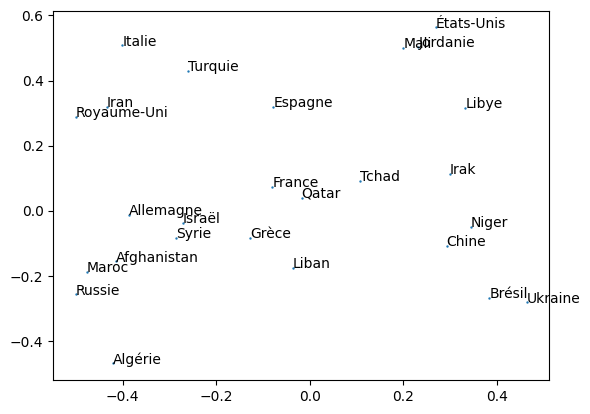

In [31]:
plt.scatter(df.V1, df.V2, s=0.5)
for i in range(df.shape[0]):
    plt.annotate(df.index[i], (df.V1[i], df.V2[i]))
plt.show()

----------------------

# Matrice de coocurrence

**Récupération des pays les plus cités**

In [32]:
articles = ['mali--www.egaliteetreconciliation.fr',
               'mali--french.presstv.ir',
               'mali--fr.sputniknews.africa',
               'france--www.fdesouche.com',
               'france--www.egaliteetreconciliation.fr',
               'france--french.presstv.ir',
               'france--fr.sputniknews.africa']

doc = articles[0]

pays = pd.read_csv(f"./data/Dashboard/pays/df_loc_nb_pays_occ_sans_france_mali----{doc}.csv")
df_subset_pays = pays.head(10)

print(df_subset_pays)

           Pays  Nombre articles pays Code_ISO3
0         Niger                    15       NER
1    États-Unis                    13       USA
2  Burkina Faso                    12       BFA
3        Russie                     9       RUS
4         Syrie                     8       SYR
5       Algérie                     7       DZA
6         Tchad                     6       TCD
7         Libye                     5       LBY
8       Turquie                     5       TUR
9        Israël                     4       ISR


**Création de la matrice**

In [33]:
#Création de la matrice vide
df = pd.DataFrame(index=df_subset_pays['Pays'].tolist(), columns=df_subset_pays['Pays'].tolist())

#On la remplie de 0
df = df.fillna(0)
print(df)

#On la remplie
for pays1 in df_subset_pays['Pays'].tolist() :
    for pays2 in df_subset_pays['Pays'].tolist() :
        if pays1 in modele.wv.key_to_index and pays2 in modele.wv.key_to_index :
            df.at[pays1,pays2] = int(words.similarity(pays1, pays2)*100)

# Supprimer les lignes où toutes les valeurs sont zéros
df = df.loc[(df != 0).any(axis=1)]

# Supprimer les colonnes où toutes les valeurs sont zéros
df = df.loc[:, (df != 0).any(axis=0)]


print(df)

fig = px.imshow(df, text_auto=True)
fig.show()

              Niger  États-Unis  Burkina Faso  Russie  Syrie  Algérie  Tchad  \
Niger             0           0             0       0      0        0      0   
États-Unis        0           0             0       0      0        0      0   
Burkina Faso      0           0             0       0      0        0      0   
Russie            0           0             0       0      0        0      0   
Syrie             0           0             0       0      0        0      0   
Algérie           0           0             0       0      0        0      0   
Tchad             0           0             0       0      0        0      0   
Libye             0           0             0       0      0        0      0   
Turquie           0           0             0       0      0        0      0   
Israël            0           0             0       0      0        0      0   

              Libye  Turquie  Israël  
Niger             0        0       0  
États-Unis        0        0       0  
Bu

**Sauvegarde du data frame**

In [34]:
# df.to_csv('./data/Dashboard/pays/Word2VecMatrice/df_loc_pays_word2vec_sans_france_mali----mali--www.egaliteetreconciliation.fr.csv', index=False)